###### 1. Import libraries, path, and dataframes
###### 2a. Create bar chart with orders_day_of_week
###### 2b. Create histogram and scatterplot
###### 2c. Line Plot 
###### 4. Bar chart for loyalty flags
###### 5. Difference in spending during the day (line graph)
###### 6. Create a line chart with age and number of dependants

#1. Import libraries, path, and dataframes

In [24]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [25]:
#Import path
path = r'/Users/owner/Documents/05_2023_Instacart_Basket_Analysis'

In [26]:
#Import files
df_insta = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_merged.pkl'))

In [27]:
df_insta.shape

(32404859, 30)

#2. Create bar chart

Text(0, 0.5, 'Orders (millions)')

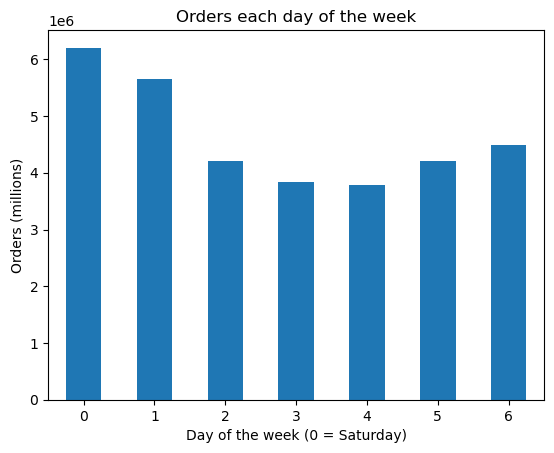

In [28]:
bar_order_dow=df_insta['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders each day of the week')
plt.xlabel('Day of the week (0 = Saturday)')
plt.xticks(rotation = 0)
plt.ylabel('Orders (millions)')

#2b. Create histogram and scatterplot

<Axes: ylabel='Frequency'>

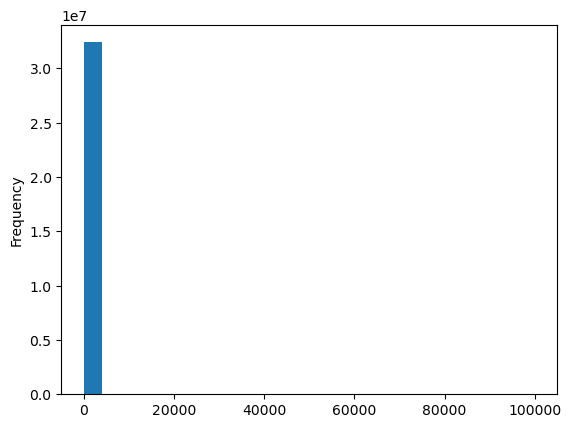

In [29]:
#histogram
df_insta['prices'].plot.hist(bins=25)

In [13]:
#Create scatter
df_insta['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956361e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

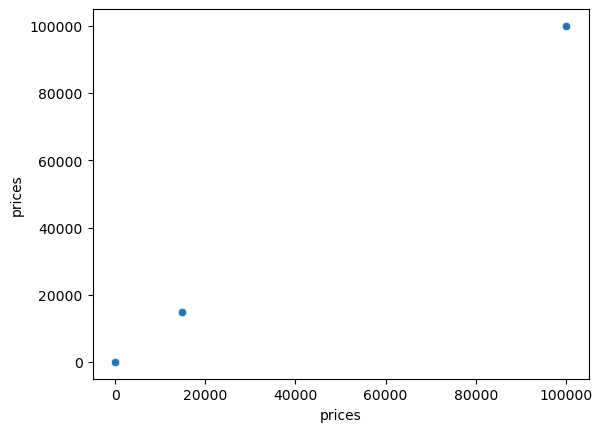

In [14]:
scatter=sns.scatterplot(x='prices', y='prices', data=df_insta)

In [32]:
#Change prices value to missing
df_insta.loc[df_insta['prices']>100, 'prices'] = np.nan

In [33]:
df_insta.loc[df_insta['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,orders_hour_of_day,gender,state,age,date_joined,number_dependants,fam_status,income


In [35]:
#Check if worked
df_insta['prices'].max()

25.0

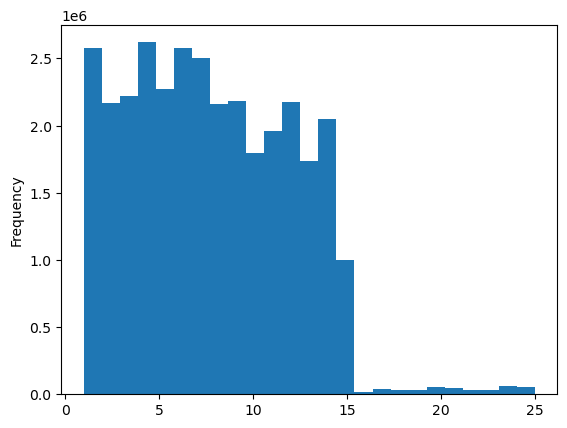

In [36]:
#Create and save histogram on python
hist_prices = df_insta['prices'].plot.hist(bins = 25)

3. Each bin shows number of orders placed during each hour (24 bins)

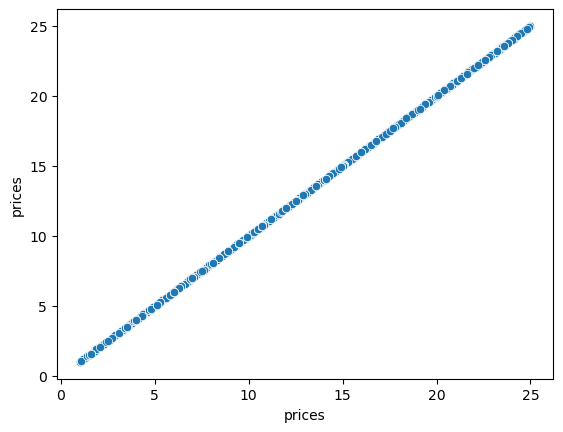

In [38]:
#Create scatterplot
scatter=sns.scatterplot(x='prices', y='prices', data=df_insta)

#2c. Line plot 

In [39]:
#1- need sample data to accurately represent
# setting a seed - .7 for a 70%/30% split
np.random.seed(4)

In [41]:
#create list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(df_insta)) <= 0.7

In [43]:
#splitting the dataframe into 2 dataframes
#store 70% of the sample in dataframe big
big = df_insta[dev]

In [44]:
#store 30% in dataframe small 
small = df_insta[~dev]

In [46]:
#set dataframe to use smaller sample for this example
df = small[['orders_day_of_week','prices']]

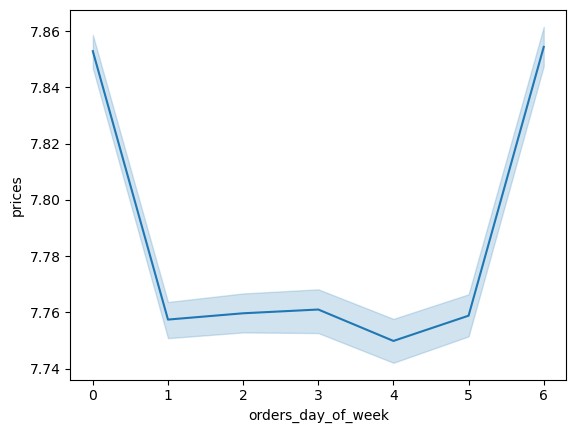

In [48]:
#Create line chart
line = sns.lineplot(data = df, x = 'orders_day_of_week', y = 'prices')

#2d. Export bar, hist, scatter, and line

In [50]:
#Export
bar_order_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_bar_dow.png'))
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'full_hist_prices.png'))
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_scatter_prices.png'))
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_line_price_orderdow.png'))

#4. Bar chart for loyalty flags

Text(0, 0.5, 'Orders (millions)')

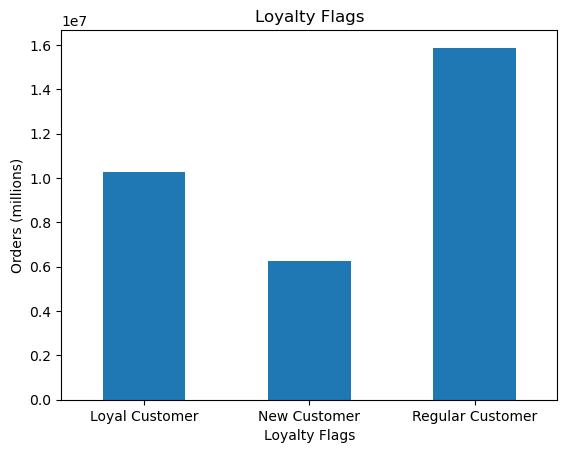

In [51]:
#Bar chart for loyalty flags
bar_lf=df_insta['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.title('Loyalty Flags')
plt.xlabel('Loyalty Flags')
plt.xticks(rotation = 0)
plt.ylabel('Orders (millions)')

#5. Difference in spending during the day (line graph)

In [52]:
# Using small sample 
#include only the columns needed for the line chart
df_2 = small[['orders_hour_of_day','prices']]

([<matplotlib.axis.XTick at 0x7ff3bb924370>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

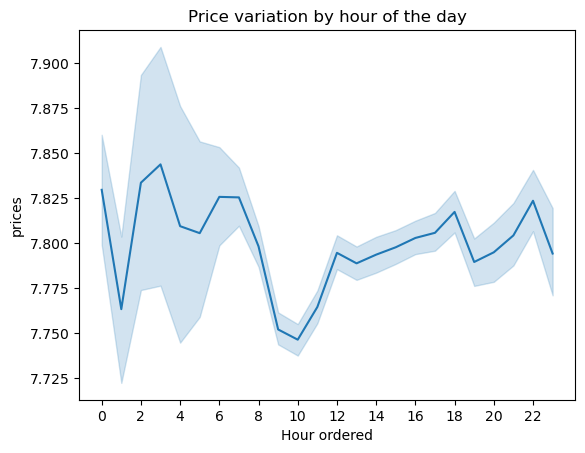

In [53]:
#Create line chart comparing prices by hour of day
line_price_hour = sns.lineplot(data = df_2, x = 'orders_hour_of_day',y = 'prices')
plt.title('Price variation by hour of the day')
plt.xlabel('Hour ordered')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])

#6. Create a line chart with age and number of dependants

In [54]:
# Using the small sample
#include only the columns needed for the line chart
df_3 = small[['age','number_dependants']]

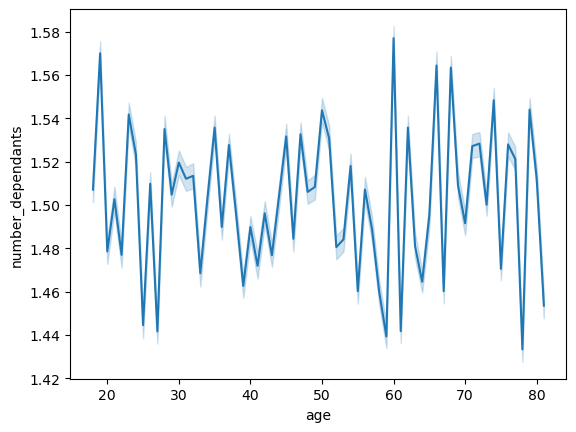

In [55]:
#Create line chart comparing number of dependants by age of customer
line_age_dependants = sns.lineplot(data = df_3, x = 'age',y = 'number_dependants')

No trend between age and number of dependants 

#7. Age and Income scatterplot

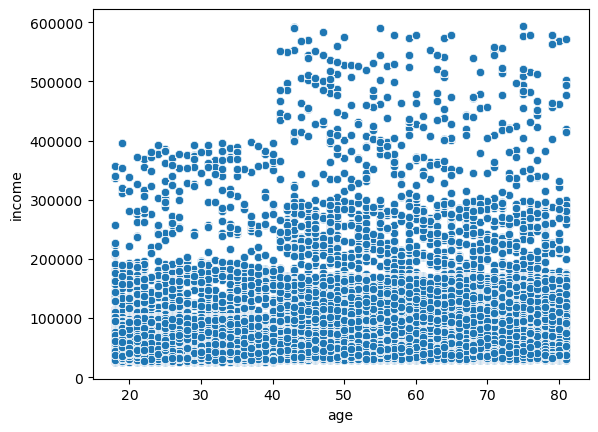

In [59]:
#Create a scatterplot with age and income
scatter_2 = sns.scatterplot(x = 'age', y = 'income',data = df_insta)

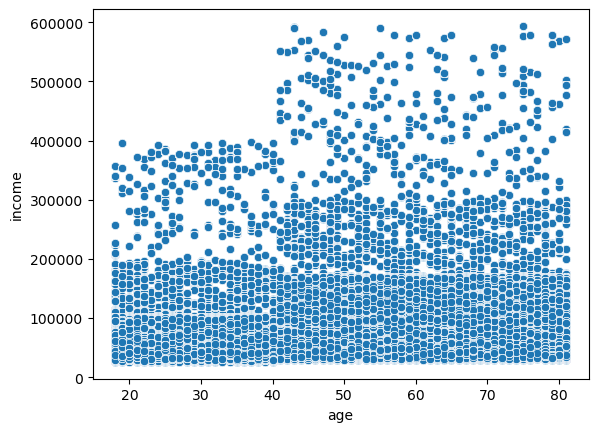

In [61]:
#Create a scatterplot with age and income with small sample
scatter_3_small = sns.scatterplot(x = 'age', y = 'income',data = small)

In the scatterplots above (sample and full), most people between 20 and 40 in age have an income up to 200,000 with some outliers up to 400,000. Those above 40 mostly have an income less than 300,000 with outliers up to 600,000.

In [62]:
#Export
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_line_price_hour.png'))
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'full_line_age_dependants.png'))
scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_scatter_age_income.png'))
scatter_3_small.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_scatter_age_income_sample.png'))

In [64]:
bar_lf.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'full_bar_loyalty.png'))